# Coronavirus data analysis

## Cumulative cases per country

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [150]:
stat = pd.read_csv("data/covid_19_data.csv", low_memory=False)

In [151]:
stat[stat['Country/Region'] == 'Germany'].head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
318,319,01/28/2020,Bavaria,Germany,1/28/20 23:00,4.0,0.0,0.0
370,371,01/29/2020,Bavaria,Germany,1/29/20 19:30,4.0,0.0,0.0
426,427,01/30/2020,Bavaria,Germany,1/30/20 16:00,4.0,0.0,0.0
471,472,01/31/2020,Bavaria,Germany,1/31/2020 23:59,5.0,0.0,0.0
530,531,02/01/2020,NaN,Germany,2/1/2020 18:33,8.0,0.0,0.0


In [152]:
cases_germany = stat[stat['Country/Region'] == 'Germany'][['Confirmed', 'ObservationDate']].dropna()
cases_italy = stat[stat['Country/Region'] == 'Italy'][[ 'Confirmed','ObservationDate']].dropna()
cases_china = stat[stat['Country/Region'] == 'Mainland China'][['Confirmed', 'ObservationDate']].dropna()

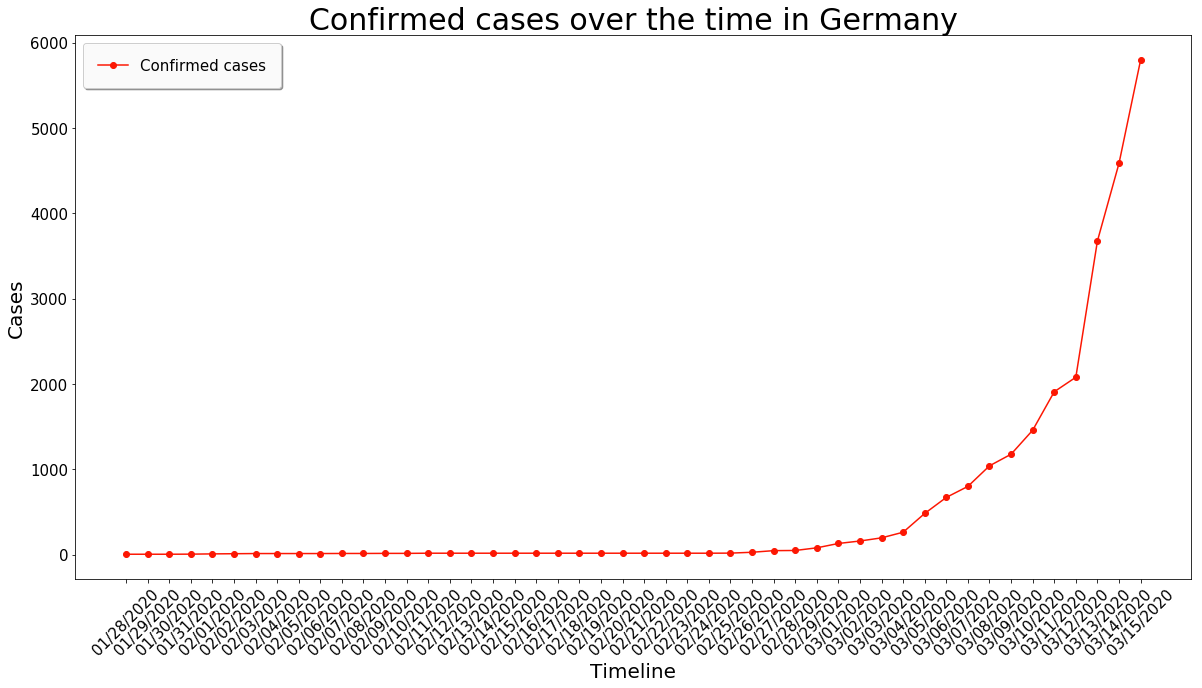

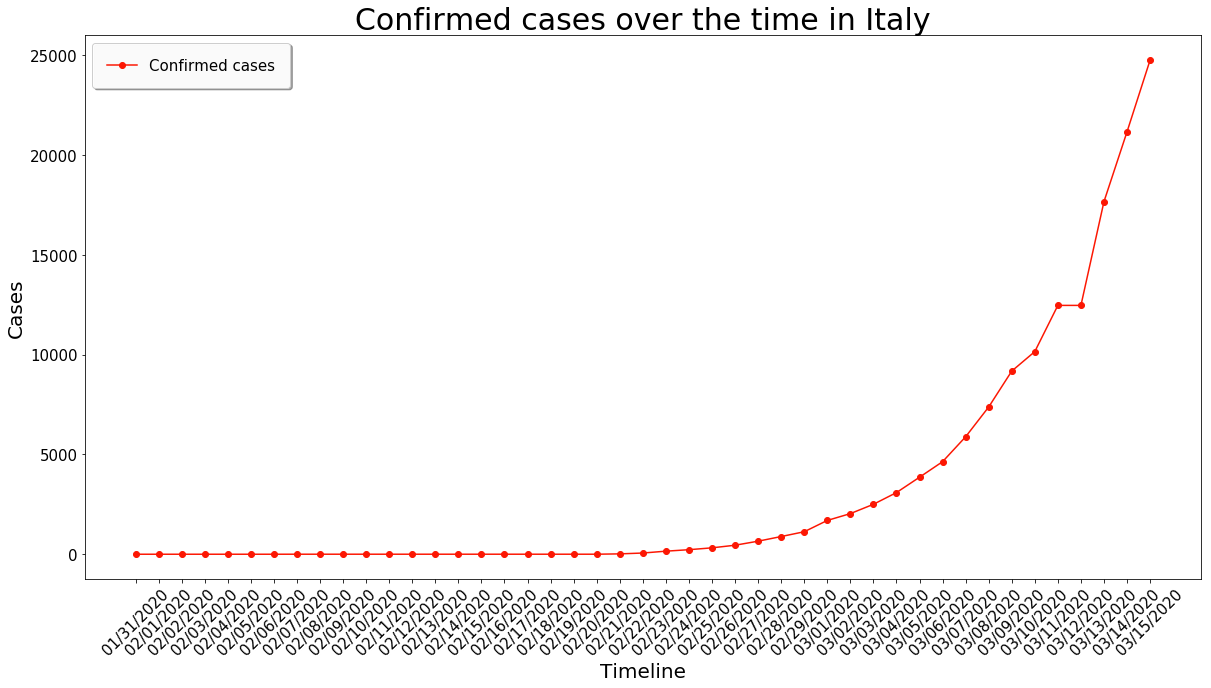

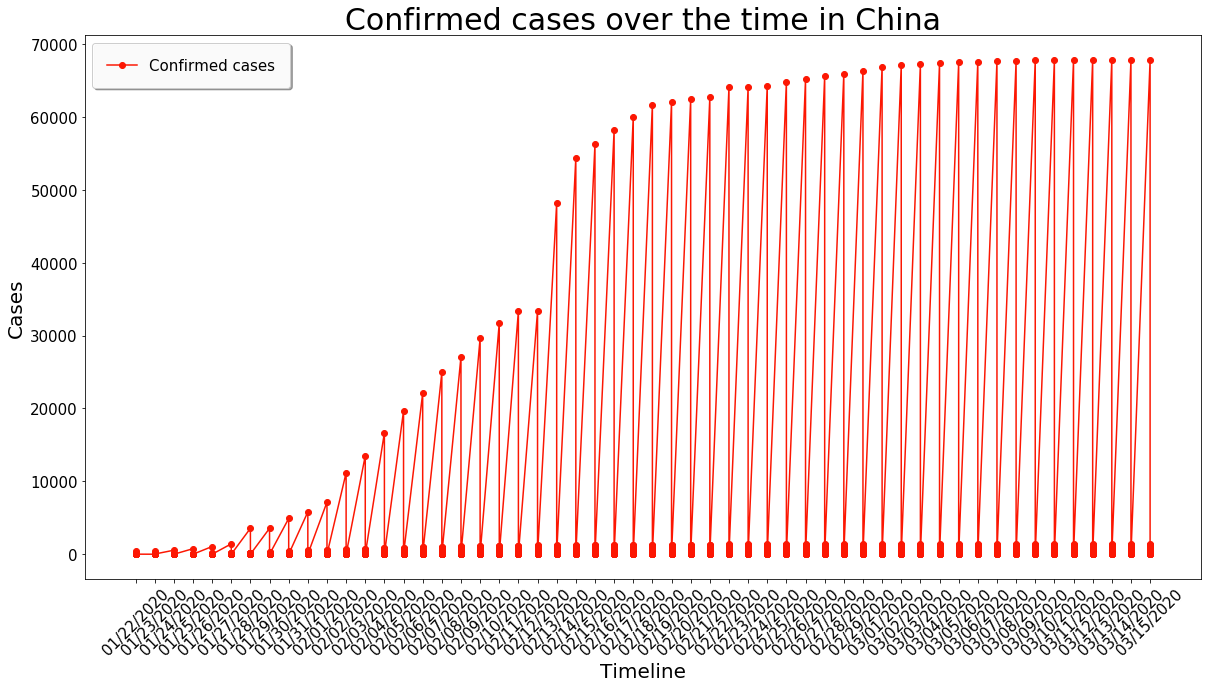

In [153]:
def plot_country(data, country):
    plt.figure(figsize=(20,10))

    plt.plot(data['ObservationDate'], data['Confirmed']
        , color = '#fc1703'
        , label = 'Confirmed cases'
        , marker = 'o')

    plt.title('Confirmed cases over the time in ' + country, size=30)
    plt.ylabel('Cases',size=20)
    plt.xlabel('Timeline',size=20)
    plt.xticks(rotation=45,size=15)
    plt.yticks(size=15)

    plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);
    
plot_country(cases_germany, 'Germany')
plot_country(cases_italy, 'Italy')
plot_country(cases_china, 'China')

## Symptoms

In [155]:
df = pd.read_csv("data/covid19_cases.csv", low_memory=False)

In [156]:
df.columns

Index(['ID', 'age', 'sex', 'city', 'province', 'country',
       'wuhan(0)_not_wuhan(1)', 'latitude', 'longitude', 'geo_resolution',
       'date_onset_symptoms', 'date_admission_hospital', 'date_confirmation',
       'symptoms', 'lives_in_Wuhan', 'travel_history_dates',
       'travel_history_location', 'reported_market_exposure',
       'additional_information', 'chronic_disease_binary', 'chronic_disease',
       'source', 'sequence_available', 'outcome', 'date_death_or_discharge',
       'notes_for_discussion', 'location', 'admin3', 'admin2', 'admin1',
       'country_new', 'admin_id', 'data_moderator_initials'],
      dtype='object')

In [157]:
df['symptoms'].dropna()

5                                                pneumonia
6                                                    fever
8                                                    fever
10                                               pneumonia
13                                                   cough
14                                                   fever
17                                                   fever
18                                fatigue, fever, headache
20                                                   fever
21                                                   fever
22                                                   fever
23                                                   fever
50                                          fatigue, fever
78                                       discomfort, fever
79                                        cough, dizziness
87                         cough, fatigue, fever, weakness
88                                  cough, fever, weakne

In [69]:
import re 

all_symptoms = dict()

def parse_symptoms(row):
    if pd.isna(row['symptoms']) or pd.isnull(row['symptoms']):
        return
    symptoms = re.split(',|;|and', str(row['symptoms']))
    
    for symptom in symptoms:
        if re.match('([A-Za-z ]+)', symptom):  
            match = re.search('([A-Za-z ]+)', symptom, re.IGNORECASE)
            all_symptoms[match.group(1).lower().strip()] = [0]
            
df.apply(lambda row: parse_symptoms(row), axis=1)

print(all_symptoms)

{'pneumonia': [0], 'fever': [0], 'cough': [0], 'fatigue': [0], 'headache': [0], 'discomfort': [0], 'dizziness': [0], 'weakness': [0], 'diarrhea': [0], 'rhinorrhoea': [0], 'sneezing': [0], 'anhelation': [0], 'pleural effusion': [0], 'nasal congestion': [0], 'pleuritic chest pain': [0], 'sore throat': [0], 'weak': [0], 'muscular soreness': [0], 'chest distress': [0], 'expectoration': [0], 'sneeze': [0], 'muscular stiffness': [0], 'sputum': [0], 'chest tightness': [0], 'dyspnea': [0], 'pharynx': [0], 'chills': [0], 'muscle aches': [0], 'other symptoms': [0], 'sore muscle': [0], 'systemic weakness': [0], 'runny nose': [0], 'rigor': [0], 'lack of energy': [0], 'muscle pain': [0], 'pharyngalgia': [0], 'pneumonitis': [0], 'flu': [0], 'conjunctivitis': [0], 'asymptomatic': [0], 'shortness of breath': [0], 'shortness breath': [0], 'coughing': [0], 'nausea': [0], 'myalgia': [0], 'joint pain': [0], 'dry cough': [0], 'sore limbs': [0], 'rhinorrhea': [0], 'myalgias': [0], 'aching muscles': [0], 'ac

In [70]:
sym_cols = ['sex'] + list(all_symptoms)
sym_data = dict(all_symptoms)
sym_data['sex'] = [np.nan]

df_symptoms = pd.DataFrame(columns = sym_cols)
pattern = re.compile('([A-Za-z ]+)', re.IGNORECASE)

def create_case_with_symptoms(row):
    if pd.isna(row['symptoms']) or pd.isnull(row['symptoms']):
        return
    
    global df_symptoms
    global pattern
    global all_symptoms
    symptoms = re.split(',|;|and', str(row['symptoms']))
    new_row = pd.DataFrame(columns=sym_cols, data=sym_data)
    
    for symptom in symptoms:
        if pattern.match(symptom):  
            match = re.search(pattern, symptom)
            sym = match.group(1).lower().strip()
            if sym in all_symptoms:
                new_row[sym] = [1]
                
    new_row['sex'] = [row['sex']]
    df_symptoms = df_symptoms.append(new_row)
                
df1 = df.apply(create_case_with_symptoms, axis=1)
                

In [71]:
symptoms_agg = df_symptoms.groupby(['sex']).agg(['sum'])
symptoms_agg.columns = symptoms_agg.columns.droplevel(1)

symptoms_agg.T.sort_values(by=['female'], ascending=False).head(10).style.background_gradient(cmap='Greens')

sex,female,male
fever,147,208
cough,84,93
sore throat,23,19
fatigue,15,13
headache,11,9
runny nose,11,5
chills,11,10
pneumonitis,8,9
pneumonia,6,8
mild,5,3


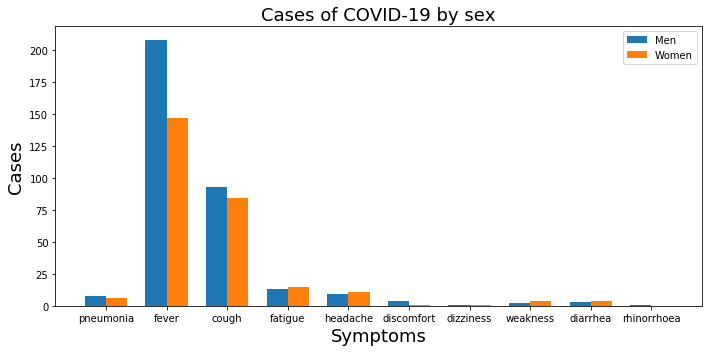

In [72]:
%matplotlib inline 

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = symptoms_agg.T.index.to_series().head(10)
labels

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 5))

rects1 = ax.bar(x - width/2, symptoms_agg.T['male'].head(10).values, width, label='Men')
rects2 = ax.bar(x + width/2, symptoms_agg.T['female'].head(10).values, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cases', fontsize=18)
ax.set_xlabel('Symptoms', fontsize=18)
ax.set_title('Cases of COVID-19 by sex',fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

## Age

In [149]:
def add_age_range(row):
    if pd.isna(row['age']) or pd.isnull(row['age']):
        row['age_range'] = pd.NA
    
    match = re.match('\d+', row['age'])
    if match:
        age = int(match.group(0))
        if age < 10:
            row['age_range'] = '<10'
        if age >=10 and age < 20:
            row['age_range'] = '10-19'
        if age >=20 and age < 30:
            row['age_range'] = '20-29'  
        if age >=30 and age < 40:
            row['age_range'] = '30-39' 
        if age >=40 and age < 50:
            row['age_range'] = '40-49' 
        if age >=50 and age < 60:
            row['age_range'] = '50-59' 
        if age >=60 and age < 70:
            row['age_range'] = '60-69'
        if age >=70:
            row['age_range'] = '>=70'
    return row        
        
df_age = df_age.dropna(subset=['age']).apply(add_age_range, axis=1)
    

KeyError: ['age']

In [75]:
df_age = df_age[['ID', 'age_range']].groupby('age_range').count().sort_values(by='ID', ascending=False)

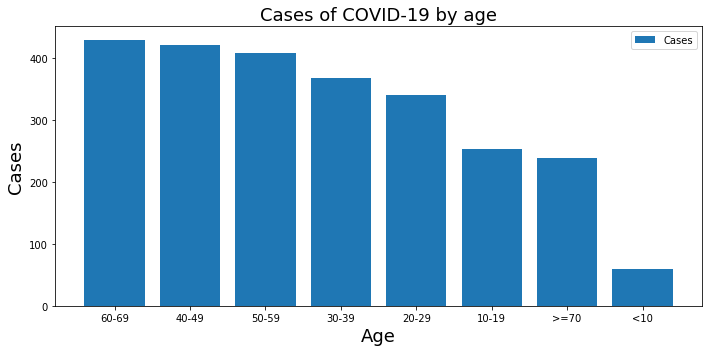

In [76]:
%matplotlib inline 

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = df_age.index.to_series()
fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(len(labels))  # the label locations
ax.bar(x, df_age['ID'].values, label='Cases')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cases', fontsize=18)
ax.set_xlabel('Age', fontsize=18)
ax.set_title('Cases of COVID-19 by age',fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

## Wait for hospital admission period 

In [105]:
df_admission = df.dropna(subset=['date_onset_symptoms', 'date_admission_hospital'])
df_admission[['date_onset_symptoms', 'date_admission_hospital']].head(10)

,date_onset_symptoms,date_admission_hospital
0,18.01.2020,20.01.2020
1,10.01.2020,21.01.2020
2,15.01.2020,20.01.2020
3,17.01.2020,20.01.2020
4,10.01.2020,21.01.2020
6,21.01.2020,21.01.2020
8,19.01.2020,24.01.2020
9,17.01.2020,22.01.2020
13,22.01.2020,22.01.2020
14,21.01.2020,21.01.2020


In [100]:
from datetime import datetime

def admission_wait(row):
    try:
      sick_date = datetime.strptime(row['date_onset_symptoms'], '%d.%m.%Y')
      admission_date = datetime.strptime(row['date_admission_hospital'], '%d.%m.%Y')
      delta = admission_date - sick_date
    except:
      row['wait_days'] = -1
      return row
    
    row['wait_days'] = delta.total_seconds() / 86400
    return row
    
df_admission = df_admission.apply(admission_wait, axis=1)    

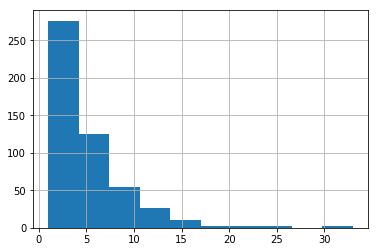

In [104]:
df_admission['wait_days'][df_admission['wait_days'] > 0].hist()

## Travel history

In [83]:
not_china = df[['ID', 'country', 'travel_history_location']][df['country'] != 'China']
travel_locations = not_china[['ID', 'travel_history_location']].groupby('travel_history_location').count().sort_values(by='ID', ascending=False)
travel_locations.head(10)

,ID
travel_history_location,
Italy,143
Iran,135
Wuhan,122
South Tyrol,77
Egypt,30
Northern Italy,28
Italy or Austria,18
United States,15
China,15
